In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
df = pd.read_csv("housing.csv")
print(df.info())
print(df.shape)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### from the above data it is clear that our target label is `median house value`

In [53]:
print("Missing Values : ")
print(df.isnull().sum())

print(df['ocean_proximity'].unique())
df.describe()

Missing Values : 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### The `total bedroom` feature in dataset have `207` missing values
##### The dataset have only one categorial coloum `ocean proximity` which has `['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']` 


Text(0, 0.5, 'frequency')

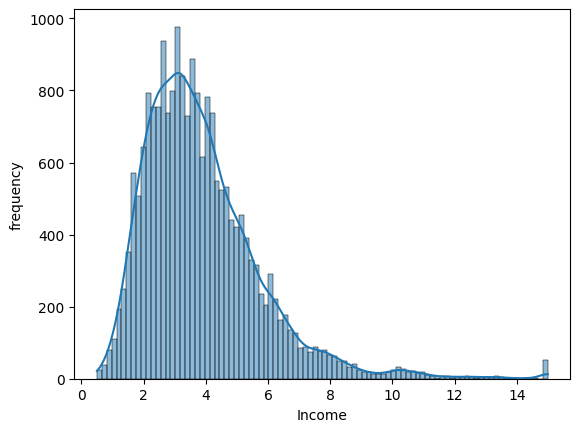

In [54]:
sns.histplot(df['median_income'],kde=True)
plt.xlabel("Income")
plt.ylabel("frequency")


from the graph we can deduce that median income had `positive` or `right` `skew`


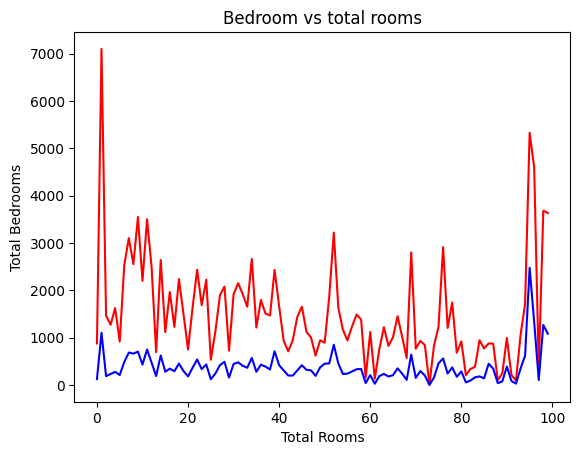

<Figure size 1000x600 with 0 Axes>

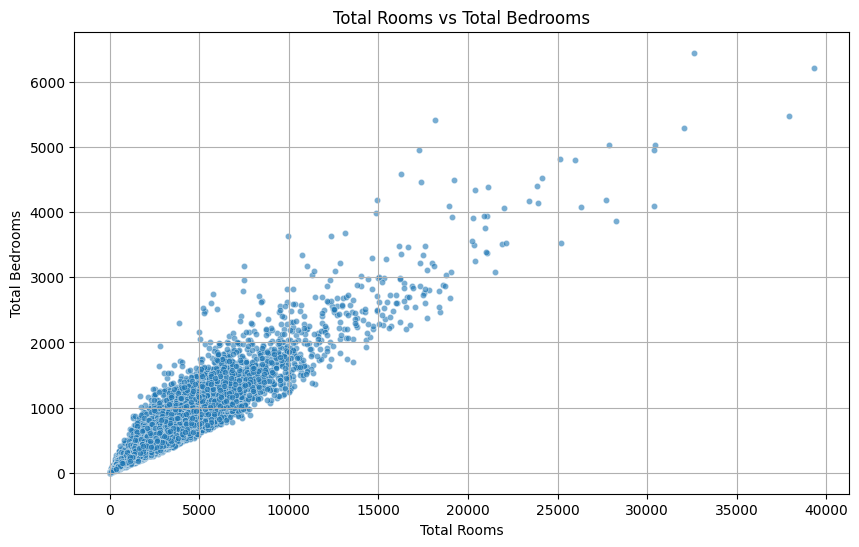

In [55]:
x = df['total_rooms'][:100]
y = df['total_bedrooms'][:100]
plt.plot (x,color = 'red',label ="Total Room" )
plt.plot (y,color = 'Blue',label ="Total BedRoom" )
plt.xlabel("Total Rooms")
plt.ylabel("Total Bedrooms")
plt.title("Bedroom vs total rooms")
plt.figure(figsize=(10, 6))


plt.figure(figsize=(10, 6))
sns.scatterplot ( x = 'total_rooms',y = 'total_bedrooms',data = df ,alpha = 0.6,s = 20)
plt.title('Total Rooms vs Total Bedrooms')
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.grid(True)
plt.show()


with the help of the plots above we obsevrve strong corelation between the two features

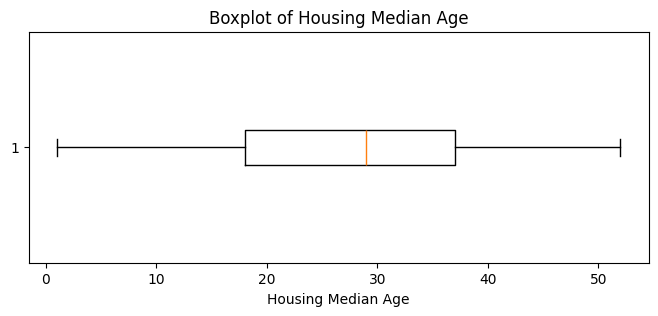

In [56]:
plt.figure(figsize=(8,3))
plt.boxplot(df['housing_median_age'], vert=False)
plt.xlabel("Housing Median Age")
plt.title("Boxplot of Housing Median Age")
plt.show()




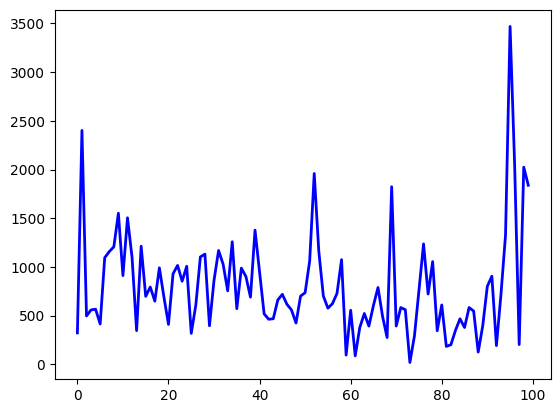

In [57]:
plt.plot(df['population'][:100],linewidth = 2,color = 'blue')

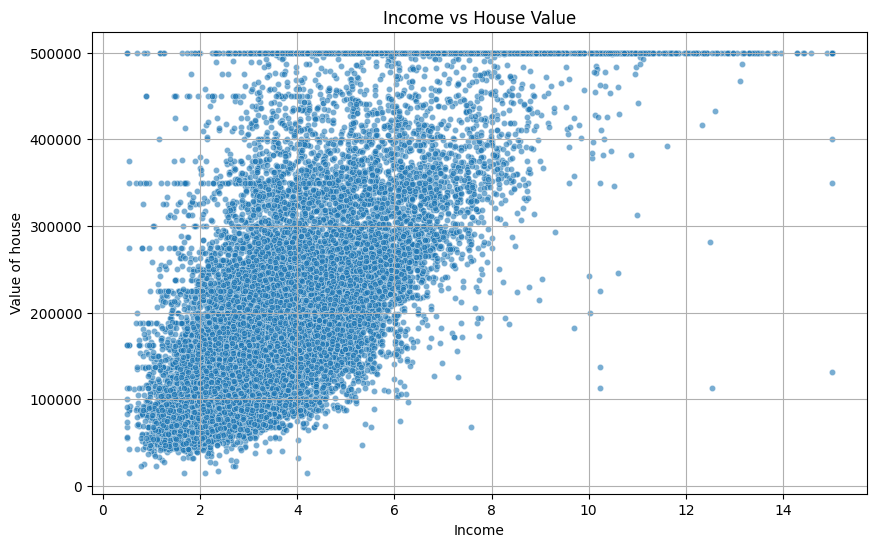

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot ( x = 'median_income',y = 'median_house_value',data = df ,alpha = 0.6,s = 20)
plt.title('Income vs House Value')
plt.xlabel('Income')
plt.ylabel('Value of house')
plt.grid(True)
plt.show()

	

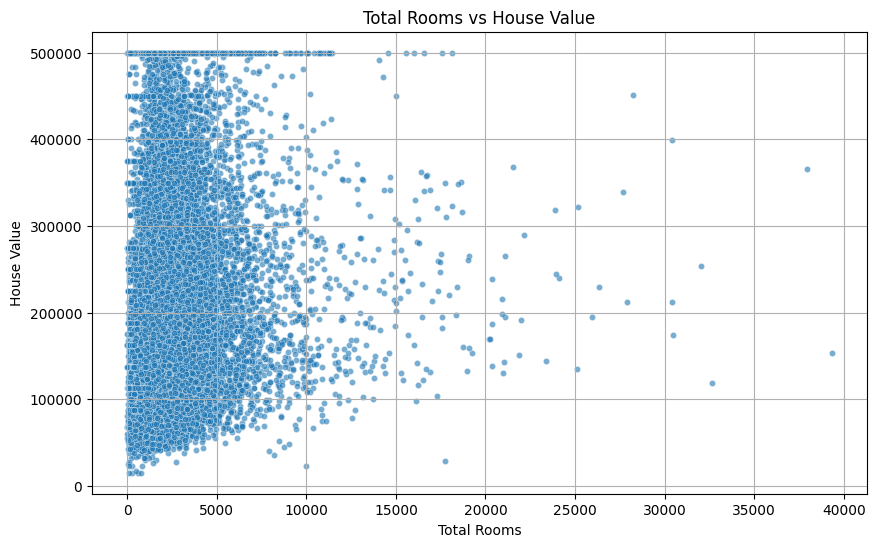

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot ( x = 'total_rooms',y = 'median_house_value',data = df ,alpha = 0.6,s = 20)
plt.title('Total Rooms vs House Value')
plt.xlabel('Total Rooms')
plt.ylabel('House Value')
plt.grid(True)
plt.show()


In [60]:
# sns.kdeplot(x='median_income', y='median_house_value', data=df, fill=True, cmap='Blues')

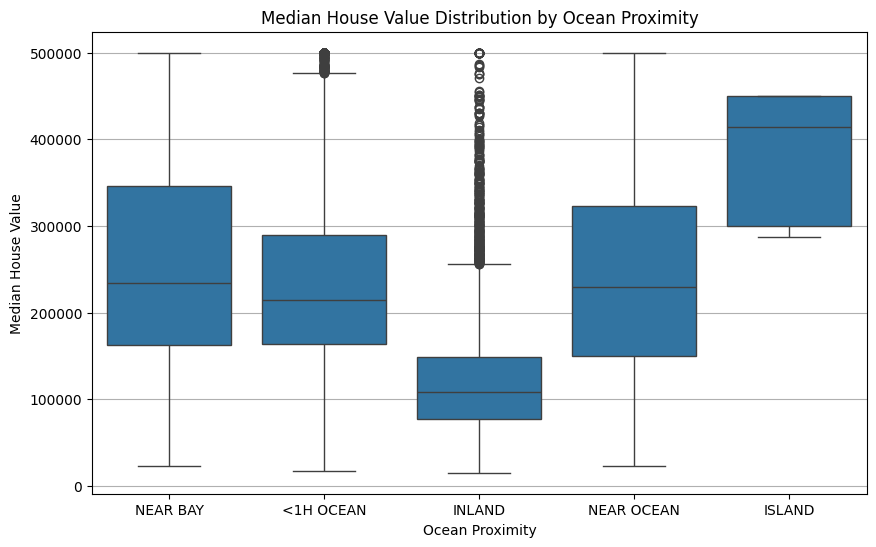

In [61]:
# plt.figure(figsize=(10, 6))

# sns.boxplot(
#     x='ocean_proximity', 
#     y='median_house_value', 
#     data=df, 
#     order=['ISLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'INLAND'] # Optional: Order categories
# )



plt.figure(figsize= (10,6))
sns.boxplot( x = 'ocean_proximity',
            y = 'median_house_value',
            data = df)

plt.title('Median House Value Distribution by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.grid(axis='y')
plt.show()

`island` properties have the highest median values having mean value just about `4,25,000` dollars<br>
where as `inland` has the lowest median values and mean value about `1,10,000` dollars <br>
`NEAR OCEAN` properties are generally `priced higher` with a median around `230,000` <br>
`NEAR BAY` are competitive with `NEAR OCEAN` properties with a slightly higher median around `240,000`<br>


## Data Handling

In [62]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0],inplace= True) 
print(df['total_bedrooms'].isnull().sum())

0


C:\Users\Harsh Giri\AppData\Local\Temp\ipykernel_24272\657726598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0],inplace= True)


I have filled missing values with `mode`


applying OHE in `Ocean Proximity`

In [63]:
encoder = OneHotEncoder(sparse_output=False)
encoded_categories = encoder.fit_transform(df[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['ocean_proximity']))

df = pd.concat([df.drop('ocean_proximity', axis=1), encoded_df], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


 handling Outliers

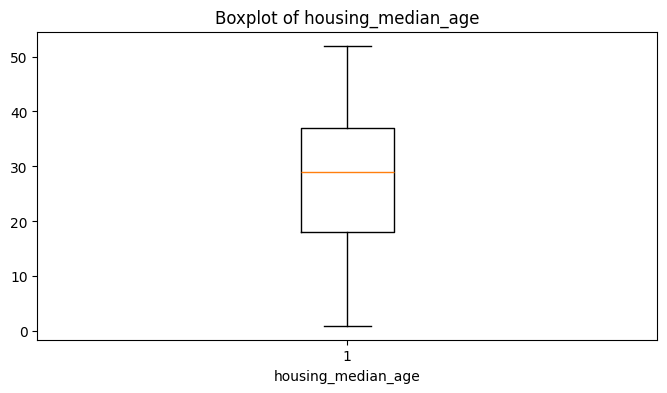

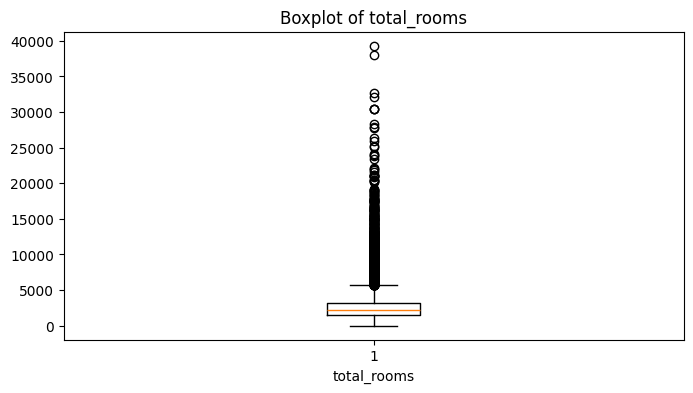

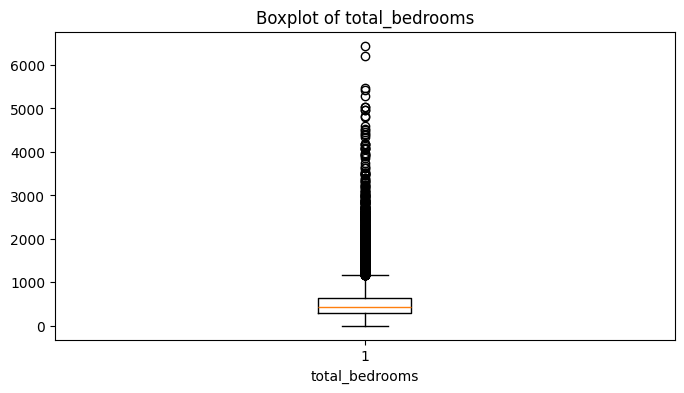

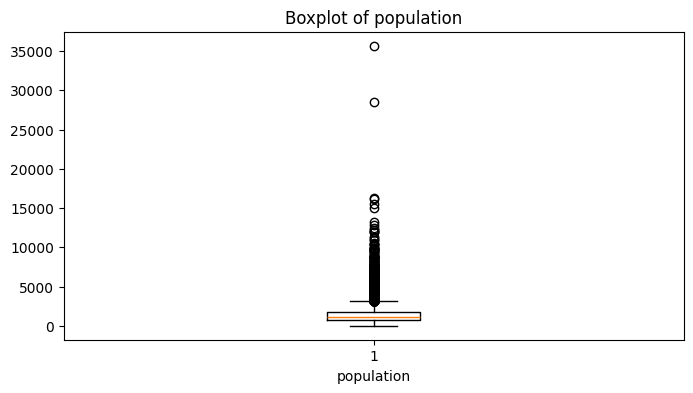

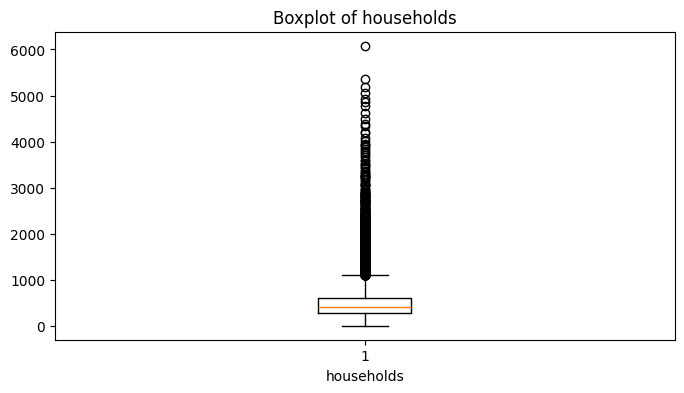

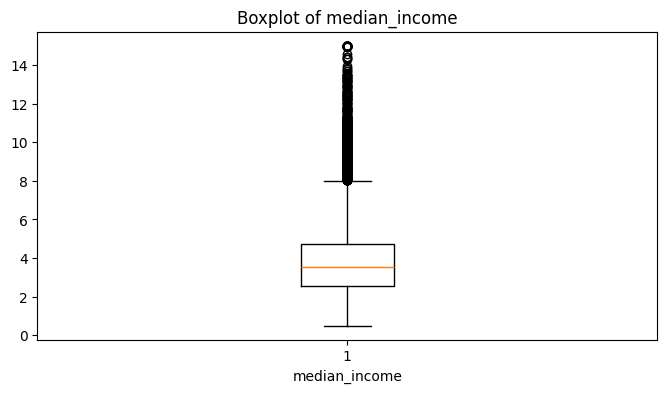

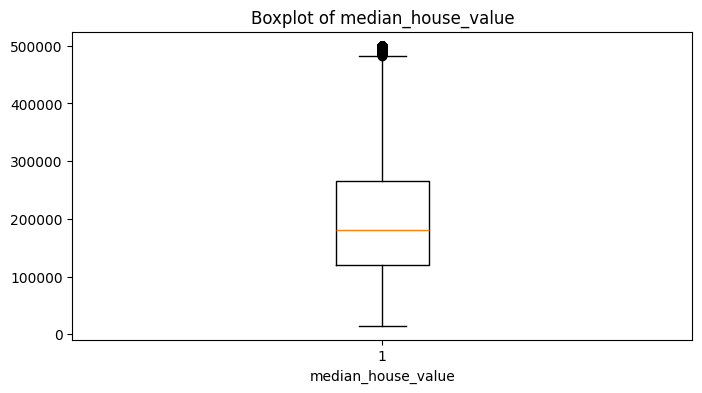

In [64]:
x = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income', 'median_house_value']

for col in x:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


Before removal
(20640, 14)
Shape after removing outliers: (16902, 14)


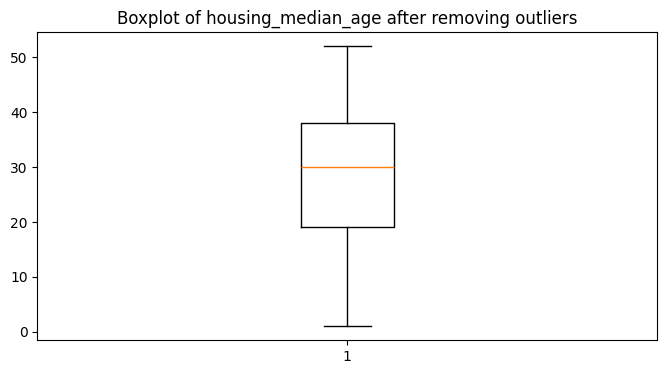

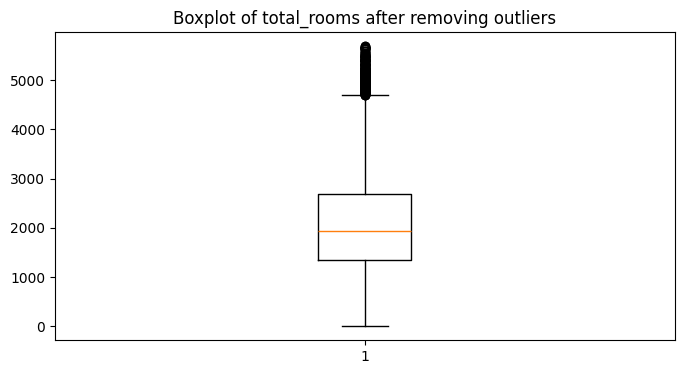

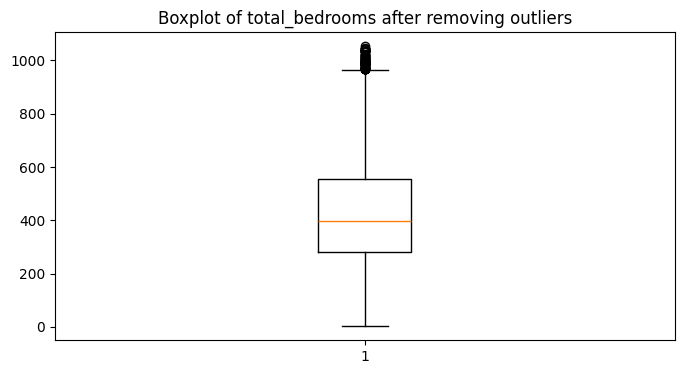

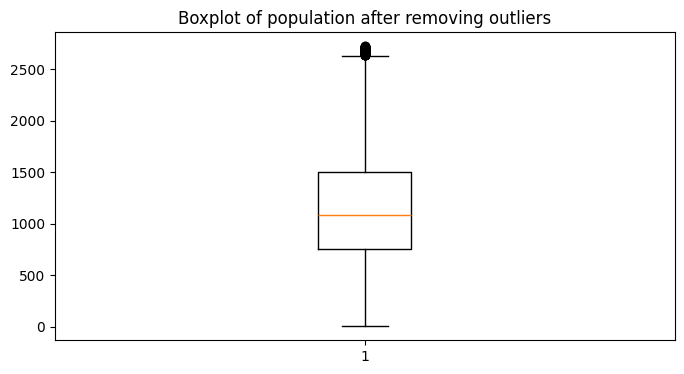

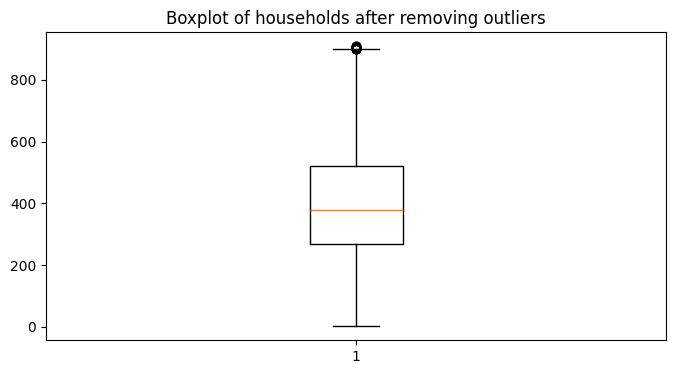

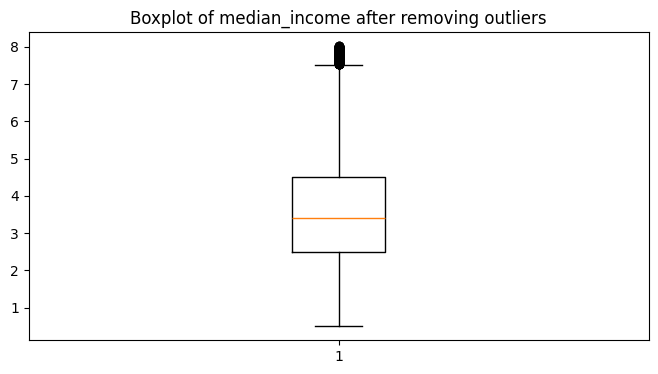

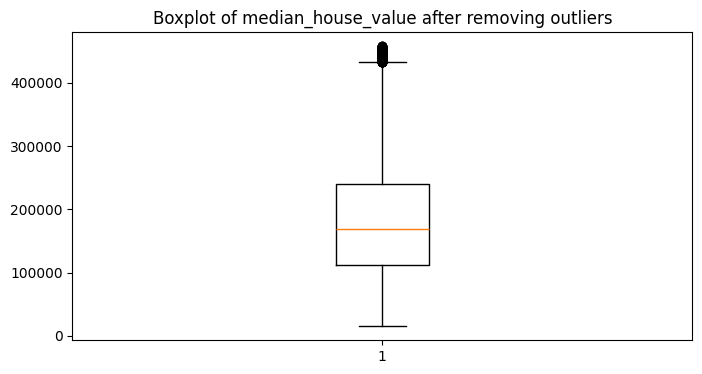

In [65]:
x = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income', 'median_house_value']
print("Before removal")
print(df.shape)
for col in x:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Shape after removing outliers:", df.shape)

# verify removal of outliers
for col in x:
    plt.figure(figsize=(8,4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col} after removing outliers')
    plt.show()


# Model Training

In [ ]:
X = df.drop('median_house_value',axis= 1)
y = df['median_house_value']

In [69]:
X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [72]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scale)
print(y_pred)

[193981.11788917 203312.19987103 170364.64034705 ...  36033.39396832
 216663.52014427 376170.76944807]


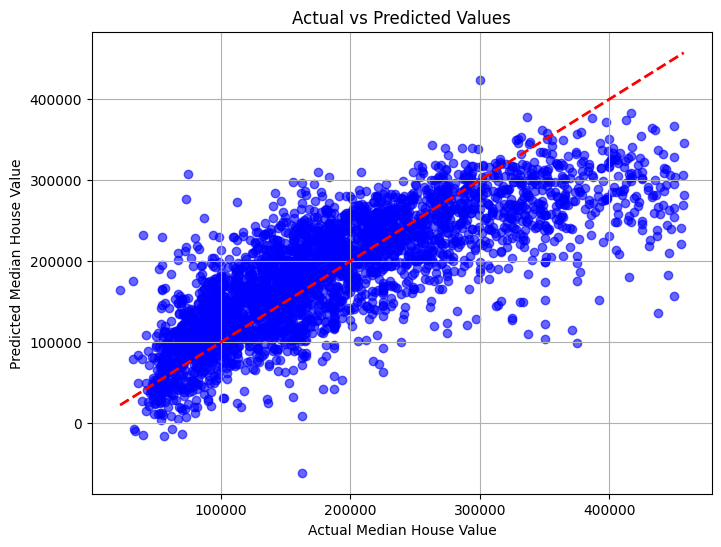

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()


In [75]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 58124.83260106667
R2 Score: 0.6156565586069704


We can see that The model is `61%` accurate
<br>
On Average the house values are off by `58k` dollars